In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import numpy as np

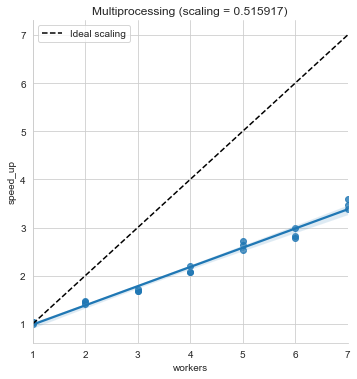

Ideal scaling has gradient 1. Observed scaling: 0.515917


In [4]:
df = pd.read_csv("mp_check.csv", index_col=0)
df["speed_up"] = df.throughput_rays_per_sec.values/df.throughput_rays_per_sec.values[0]

def lin(x, m):
    return m * x

popt, _ = curve_fit(lin, df.workers.values, df.speed_up.values)
m = popt[0]
sns.set_style("whitegrid")
sns.lmplot(x="workers", y="speed_up", data=df)
x = np.arange(np.min(df.workers), np.max(df.workers)+1)
plt.plot(x, x, "k--", label="Ideal scaling")
plt.legend()
plt.title(f"Multiprocessing (scaling = {m:f})")
plt.show()

print(f"Ideal scaling has gradient 1. Observed scaling: {m:f}")

In [3]:
df_ave = df.groupby("workers").mean()
df_ave = df_ave.drop(columns="rep")
df_ave

,secs_per_1000_rays,throughput_rays_per_sec,thrown,took,speed_up
workers,,,,,
1.0,34.766407,28.772056,5000.0,173.832036,1.023111
2.0,24.647051,40.590759,5000.0,123.235257,1.443374
3.0,20.990352,47.645110,5000.0,104.951759,1.694221
4.0,16.796765,59.586935,5000.0,83.983824,2.118862
5.0,13.523592,74.005464,5000.0,67.617959,2.631573
6.0,12.412531,80.639240,5000.0,62.062657,2.867465
7.0,10.207942,98.016794,5000.0,51.039709,3.485396
